In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lesson 17: Comparing Distributions

## Mendel and Pea Flowers ##

In [2]:
# Mendel had 929 plants, of which 709 had purple flowers
# Create an assignment statement that shows the proportion of 
# purple flowers observed and assign it to `observed_purples`
observed_purples = ...
observed_purples

0.7631862217438106

In [3]:
# Create an assignment statement called `predicted_proportion`
# that takes an array which contains the predicted percentage
# of 75% purple and 25% white flowers (as decimals, in that order)
predicted_proportions = ...

In [4]:
# Simulate a sample of size 929 that uses the population 
# distribution of 75% purple and 25% white
# Hint: use the built in function sample_proportions
...

array([ 0.73950484,  0.26049516])

In [5]:
# Create a function, `purple_flowers`
# that does not take anything in, but returns the first value
# in the array that is produced by taking a sample size of 929
# based on the pupulation distribution. Change the value to a %
def ... :
    return ...

In [10]:
# Run this cell
purple_flowers()

74.27341227125942

In [11]:
# Create an assignment statement called `purples` that
# is an "empty" array
# Create a for loop that runs up to `trials` times
# Within the for loop, there is an assignment statement called
# `new_purple` that is assigned the result of using the function 
# `purple_flowers' with no sample size designated, ie. use ()
# Append to the assignment statement `purples` the results from 
# the assignment statement `new_purple` and assign this to 
# `purples` at the end of the for loop

purples = ...
trials = 10000

for ...:
    new_purple = ...
    purples = ...

In [12]:
#Run this cell
purples

array([ 74.48869752,  74.16576964,  75.13455328, ...,  75.45748116,
        76.10333692,  76.21097955])

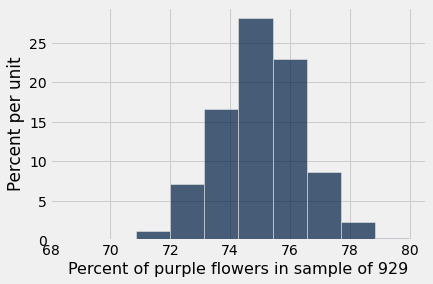

In [13]:
# Run this cell
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [ ]:
# Find the average percent of purple flowers from `purples`
...

In [14]:
# Assign to `statistics` the absolute value of the
# difference between the values in the array `purples` and 75
statistics = ...

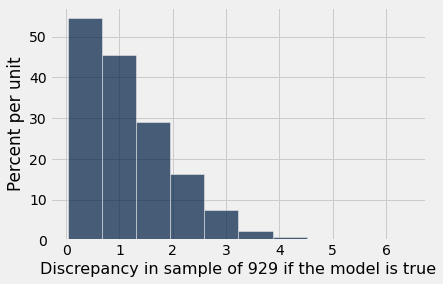

In [15]:
# Run this cell
Table().with_column('Discrepancy in sample of 929 if the model is true', statistics).hist()

In [16]:
# Find the absolute value of the difference between the 
# actual number of purple flowers as a percent (the obsserved)
# and the predicted 75%
...

1.318622174381062

## Alameda County Jury Panels ##

In [17]:
# Run this cell
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


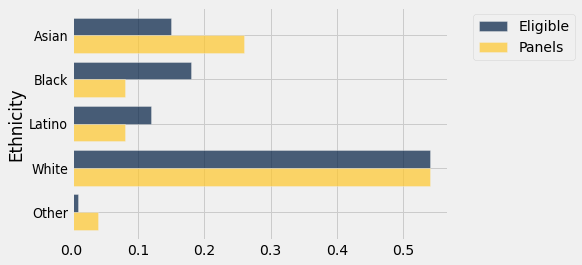

In [18]:
# Using the table `jury`, create a horizontal barchart that shows
# the Ethnicity of the county
...

In [19]:
# Run this cell
# Note: Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [20]:
# Simulate a sample of size 1423 jurors that uses the population 
# distribution provided above.  Assign this to `simulated`
simulated = ...
simulated

array([ 0.1468728 ,  0.17568517,  0.11103303,  0.55375966,  0.01264933])

In [21]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.146873
Black,0.18,0.08,0.175685
Latino,0.12,0.08,0.111033
White,0.54,0.54,0.55376
Other,0.01,0.04,0.0126493


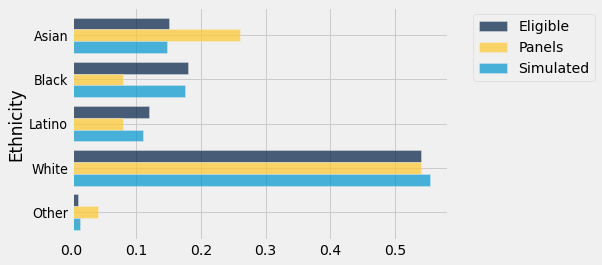

In [22]:
# Using the table `jury_with_simulated`, create a horizontal 
#barchart that shows the Ethnicity of the county
...

## Distance Between Distributions

In [23]:
# We need to understand how each of the 5 categories
# differ from their expected values according to the model.
# Run this cell
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [24]:
# Create a function called `tvd` that takes in two values
# Return the sum of the absolute value of the difference
# between the two values, divided by two
def ... :
    return ...

In [25]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)

# Assign to `obsvd_tvd` the result of applying the `tvd` function
# to the values in `Panels` and `Eligible` from the table `jury`
obsvd_tvd = ...
obsvd_tvd

0.14000000000000001

In [26]:
# The TVD of a model simluation from its expected values
# Run this cell

tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.02083626141953622

In [27]:
# Briefly discuss what is happening in this cell
# Run the cell

def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


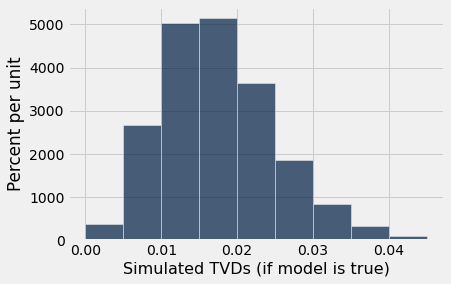

In [29]:
# Briefly discuss what is happening in this cell
# Run the cell

title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

In [ ]:
# Find the greatest tvd
...

In [ ]:
# Find the smalled tvd
...